In [1]:
# Losev Ivan 19 IAD
#
# Dataset: https://archive.ics.uci.edu/ml/datasets/Abalone
# Num of Attributes: 9
# Num of Instances 4177
#
# Task: Classification
# Goal: Predict the age of abalone from physical measurements

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

import os

In [3]:
df  = pd.read_csv(os.getcwd() + '\\abalone.data', header=None)
df.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
       'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

print(df.shape)
df.head()

(4177, 9)


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [5]:
# Add NaN values
print(df.count())
print(df.shape)
print('Num of null values: ' + str(df.isnull().sum().sum()))

nan_mat = np.random.random(df.shape)<0.15

df = df.mask(nan_mat)
print('\nNum of null values: ' + str(df.isnull().sum().sum()))

Sex               4177
Length            4177
Diameter          4177
Height            4177
Whole weight      4177
Shucked weight    4177
Viscera weight    4177
Shell weight      4177
Rings             4177
dtype: int64
(4177, 9)
Num of null values: 0

Num of null values: 5610


In [6]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,NaN,NaN,0.2245,0.1010,0.150,15.0
1,M,0.350,0.265,0.090,0.2255,NaN,0.0485,0.070,7.0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,NaN,9.0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10.0
4,I,NaN,0.255,0.080,0.2050,0.0895,0.0395,NaN,NaN


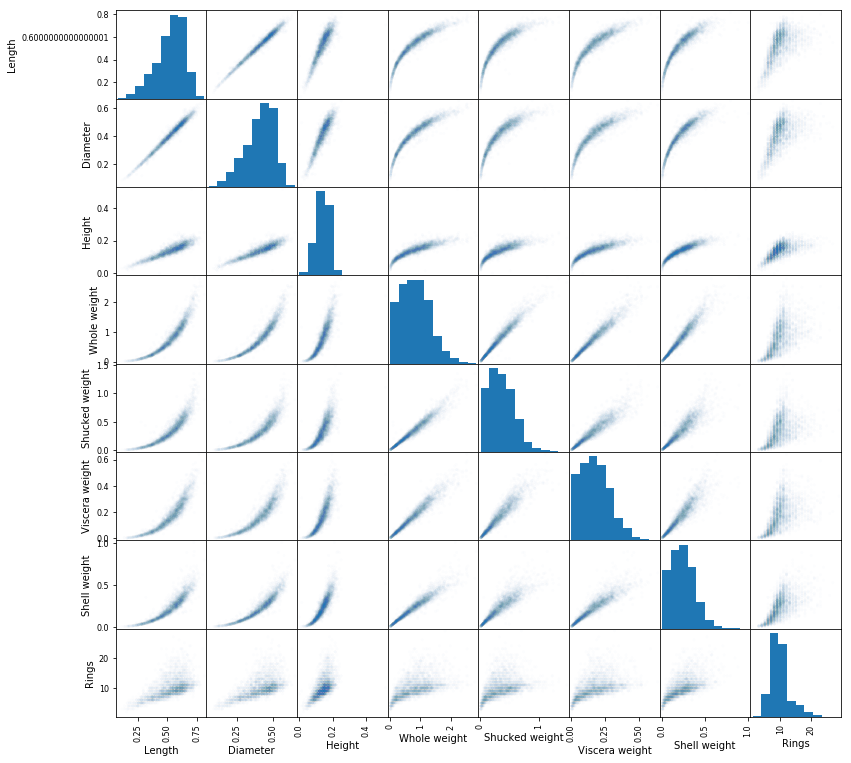

In [7]:
pd.plotting.scatter_matrix(df, alpha = .01, figsize = (13, 13))
pass

In [8]:
df.corr()
# There are high correlations betwen, for instance, Length and Diameter or Length and Whole weight
# but the correlation coefficients between physical parameters and number of rings doesn't exceed 0.6.
#
# It's also interesting that all correlation coefficients are positive and locate in range (0.4, 1)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.987181,0.893570,0.924177,0.897882,0.905121,0.899173,0.565778
Diameter,0.987181,1.000000,0.894229,0.925690,0.894648,0.901956,0.906470,0.577145
Height,0.893570,0.894229,1.000000,0.877472,0.834098,0.856626,0.879185,0.603295
Whole weight,0.924177,0.925690,0.877472,1.000000,0.969141,0.964777,0.954737,0.537246
Shucked weight,0.897882,0.894648,0.834098,0.969141,1.000000,0.931090,0.883478,0.429395
Viscera weight,0.905121,0.901956,0.856626,0.964777,0.931090,1.000000,0.908053,0.501428
Shell weight,0.899173,0.906470,0.879185,0.954737,0.883478,0.908053,1.000000,0.623214
Rings,0.565778,0.577145,0.603295,0.537246,0.429395,0.501428,0.623214,1.000000


In [9]:
for columnName in df.columns:
    if isinstance(df[columnName][0], str):
        print('{0:20}{1}'.format(columnName, ' contains string'))
    else:
        print('Mean of {0:17} {1:.5}'.format(columnName + ':', df[columnName].mean()))
    print('{:*^40}'.format(''))

Sex                  contains string
****************************************
Mean of Length:           0.5238
****************************************
Mean of Diameter:         0.40875
****************************************
Mean of Height:           0.1394
****************************************
Mean of Whole weight:     0.8323
****************************************
Mean of Shucked weight:   0.36045
****************************************
Mean of Viscera weight:   0.17891
****************************************
Mean of Shell weight:     0.23996
****************************************
Mean of Rings:            9.9394
****************************************


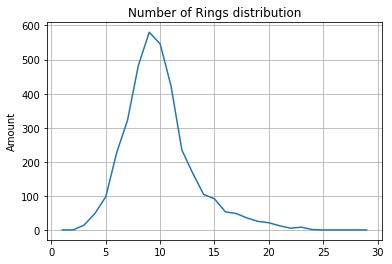

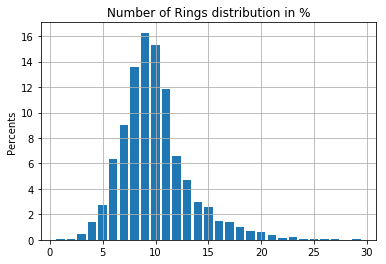

In [10]:
ringNumbers = np.sort(df['Rings'].unique())
ringNumberCounts = []
ringNumberPercents = []
for ringNum in ringNumbers:
    ringNumberCounts.append(df[df['Rings'] == ringNum]['Rings'].count())
    ringNumberPercents.append(ringNumberCounts[-1] / df['Rings'].count() * 100)

fig1, plt1 = plt.subplots()
plt1.plot(ringNumbers, ringNumberCounts)
plt1.set(title='Number of Rings distribution', ylabel='Amount')
plt1.grid()


fig2, plt2 = plt.subplots()
plt2.bar(ringNumbers, ringNumberPercents)
plt2.set(title='Number of Rings distribution in %', ylabel='Percents')
plt2.grid()


In [11]:
df.describe(include = 'all').drop(['Sex'], axis=1)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,3566.000000,3504.000000,3575.000000,3583.000000,3561.000000,3554.000000,3538.000000,3565.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.523797,0.408747,0.139400,0.832296,0.360446,0.178906,0.239955,9.939411
std,0.121029,0.099208,0.038713,0.490516,0.222195,0.108119,0.139101,3.239630
min,0.075000,0.055000,0.000000,0.002000,0.002500,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.445750,0.187000,0.092500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.804000,0.338500,0.168500,0.235000,10.000000
75%,0.615000,0.480000,0.165000,1.154000,0.504500,0.249000,0.329375,11.000000


In [12]:
# Prepare data

valuesForFillNa = {}
for columnName in df.columns:
    if isinstance(df[columnName][0], str) == False:
        valuesForFillNa[columnName] = df[columnName].mean()

valuesForFillNa['Rings'] = round(valuesForFillNa['Rings'])
clear_df = df.fillna(value=valuesForFillNa)

print('Num of NaN in \'Sex\' before clean: ' + str(clear_df.isna()['Sex'].sum(axis=0)))
clear_df = clear_df.dropna(subset=['Sex'])
print('Num of NaN in \'Sex\' after  clean: ' + str(clear_df.isna()['Sex'].sum(axis=0)))

# Normalization
numerical_data = clear_df.drop(['Sex', 'Rings'], axis=1)
numerical_data = (numerical_data - numerical_data.mean(axis = 0))/numerical_data.std(axis = 0)
                               
                               
clear_df = pd.concat([pd.get_dummies(clear_df['Sex']), numerical_data, clear_df['Rings']], axis=1)
clear_df.head()

Num of NaN in 'Sex' before clean: 640
Num of NaN in 'Sex' after  clean: 0


,F,I,M,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0,1,-0.619258,-0.485736,-0.002372,-0.004670,-0.662407,-0.783731,-0.702493,15.0
1,0,0,1,-1.557366,-1.580727,-1.372236,-1.337608,-0.007043,-1.310482,-1.327027,7.0
2,1,0,0,0.050819,0.116508,-0.124385,-0.345806,-0.508143,-0.377381,-0.000240,9.0
3,0,0,1,-0.753274,-0.485736,-0.401685,-0.699472,-0.705794,-0.653298,-0.663460,10.0
4,0,1,0,-0.004601,-1.690226,-1.649536,-1.382640,-1.313210,-1.400782,-0.000240,10.0


In [13]:
X = clear_df.drop('Rings', axis=1)
y = clear_df['Rings']
feature_names = X.columns

print(y.describe())

X = X.values
y = y.values


print(X.shape, type(X))
print(y.shape, type(y))
N, d = X.shape

count    3537.000000
mean        9.952785
std         2.993730
min         1.000000
25%         8.000000
50%        10.000000
75%        11.000000
max        29.000000
Name: Rings, dtype: float64
(3537, 10) <class 'numpy.ndarray'>
(3537,) <class 'numpy.ndarray'>


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

2829 708


In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(X_train, y_train)


y_test_predict = knn.predict(X_test)
test_err = 1 - knn.score(X_test, y_test)
print('test error: ', test_err)

test error:  0.7019774011299436


In [16]:
from sklearn.model_selection import GridSearchCV
'''
nnb = np.arange(1, 51, 2)
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)
'''

"\nnnb = np.arange(1, 51, 2)\nknn = KNeighborsClassifier()\ngrid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)\ngrid.fit(X_train, y_train)\n\nbest_cv_err = 1 - grid.best_score_\nbest_n_neighbors = grid.best_estimator_.n_neighbors\nprint(best_cv_err, best_n_neighbors)\n"

In [17]:
'''
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)
'''

'\nknn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)\n\nerr_train = np.mean(y_train != knn.predict(X_train))\nerr_test  = np.mean(y_test  != knn.predict(X_test))\n\nprint(err_train, err_test)\n'

In [18]:

from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.0 0.7161016949152542


In [19]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

Feature ranking:
 1. feature 'Shell weight' (0.150393)
 2. feature 'Shucked weight' (0.148676)
 3. feature 'Whole weight' (0.146197)
 4. feature 'Viscera weight' (0.145511)
 5. feature 'Length' (0.126348)
 6. feature 'Diameter' (0.117632)
 7. feature 'Height' (0.112990)
 8. feature '    M' (0.018496)
 9. feature '    F' (0.017446)
10. feature '    I' (0.016311)


In [20]:
# From the above results I can conclude that listed physical features are not enough to accurately predict
# the number of rings.
#
# So, I will separate 'Rings' values on several classes and try to predict them.

In [21]:
original_clear_df = clear_df.copy()

clear_df.at[clear_df['Rings'] < 5, 'Rings'] = 0
clear_df.at[(clear_df['Rings'] >= 5)  & (clear_df['Rings'] < 10), 'Rings'] = 1
clear_df.at[(clear_df['Rings'] >= 10) & (clear_df['Rings'] < 15), 'Rings'] = 2
clear_df.at[(clear_df['Rings'] >= 15) & (clear_df['Rings'] < 20), 'Rings'] = 3
clear_df.at[clear_df['Rings'] >= 20, 'Rings'] = 4

X = clear_df.drop('Rings', axis=1)
y = clear_df['Rings']

feature_names = X.columns

X = X.values
y = y.values

# --------------------- Split data on train and test ---------------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

# -------------------------   KNeighborsClassifier       -----------------------------------------------

knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(X_train, y_train)


y_test_predict = knn.predict(X_test)
test_err = 1 - knn.score(X_test, y_test)
print('KNeighborsClassifier test error: ', test_err)

# -------------------------          GridSearchCV        -----------------------------------------------

nnb = np.arange(1, 51, 2)
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print('GridSearchCV: ', best_cv_err, best_n_neighbors)

# -------------------------   KNeighborsClassifier       -----------------------------------------------

knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print('KNeighborsClassifier: ', err_train, err_test)

# -------------------------   RandomForestClassifier      -----------------------------------------------

rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print('RandomForestClassifier: ', err_train, err_test)


importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

KNeighborsClassifier test error:  0.32485875706214684
GridSearchCV:  0.336514669494521 37
KNeighborsClassifier:  0.3230823612583952 0.3192090395480226
RandomForestClassifier:  0.0 0.3432203389830508
Feature ranking:
 1. feature 'Shell weight' (0.169654)
 2. feature 'Whole weight' (0.147426)
 3. feature 'Viscera weight' (0.143027)
 4. feature 'Shucked weight' (0.134562)
 5. feature 'Height' (0.110377)
 6. feature 'Length' (0.110325)
 7. feature 'Diameter' (0.105812)
 8. feature '    I' (0.049216)
 9. feature '    F' (0.015692)
10. feature '    M' (0.013909)


In [22]:
clear_df = original_clear_df.copy()

clear_df.at[clear_df['Rings'] < 7, 'Rings'] = 0
clear_df.at[(clear_df['Rings'] >= 7)  & (clear_df['Rings'] < 12), 'Rings'] = 1
clear_df.at[(clear_df['Rings'] >= 12) & (clear_df['Rings'] < 16), 'Rings'] = 2
clear_df.at[(clear_df['Rings'] >= 16) & (clear_df['Rings'] < 20), 'Rings'] = 3
clear_df.at[clear_df['Rings'] >= 20, 'Rings'] = 4

X = clear_df.drop('Rings', axis=1)
y = clear_df['Rings']

feature_names = X.columns

X = X.values
y = y.values

# --------------------- Split data on train and test ---------------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

# -------------------------   KNeighborsClassifier       -----------------------------------------------

knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(X_train, y_train)


y_test_predict = knn.predict(X_test)
test_err = 1 - knn.score(X_test, y_test)
print('KNeighborsClassifier test error: ', test_err)

# -------------------------          GridSearchCV        -----------------------------------------------

nnb = np.arange(1, 51, 2)
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print('GridSearchCV: ', best_cv_err, best_n_neighbors)

# -------------------------   KNeighborsClassifier       -----------------------------------------------

knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print('KNeighborsClassifier: ', err_train, err_test)

# -------------------------   RandomForestClassifier      -----------------------------------------------

rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print('RandomForestClassifier: ', err_train, err_test)


importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

KNeighborsClassifier test error:  0.28954802259887
GridSearchCV:  0.26581831035701664 23
KNeighborsClassifier:  0.25874867444326616 0.2740112994350282
RandomForestClassifier:  0.0 0.2895480225988701
Feature ranking:
 1. feature 'Shell weight' (0.166837)
 2. feature 'Shucked weight' (0.149901)
 3. feature 'Whole weight' (0.143403)
 4. feature 'Viscera weight' (0.138469)
 5. feature 'Length' (0.130364)
 6. feature 'Height' (0.113465)
 7. feature 'Diameter' (0.110155)
 8. feature '    I' (0.017450)
 9. feature '    M' (0.016409)
10. feature '    F' (0.013547)


In [23]:
clear_df = original_clear_df.copy()

clear_df.at[clear_df['Rings'] < 7, 'Rings'] = 0
clear_df.at[(clear_df['Rings'] >= 7)  & (clear_df['Rings'] < 12), 'Rings'] = 1
clear_df.at[(clear_df['Rings'] >= 12) & (clear_df['Rings'] < 16), 'Rings'] = 2
clear_df.at[(clear_df['Rings'] >= 16) & (clear_df['Rings'] < 20), 'Rings'] = 3
clear_df.at[clear_df['Rings'] >= 20, 'Rings'] = 4

X = clear_df.drop(['Rings', 'I', 'M', 'F'], axis=1)
y = clear_df['Rings']

feature_names = X.columns

X = X.values
y = y.values

# --------------------- Split data on train and test ---------------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

# -------------------------   KNeighborsClassifier       -----------------------------------------------

knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(X_train, y_train)


y_test_predict = knn.predict(X_test)
test_err = 1 - knn.score(X_test, y_test)
print('KNeighborsClassifier test error: ', test_err)

# -------------------------          GridSearchCV        -----------------------------------------------

nnb = np.arange(1, 51, 2)
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print('GridSearchCV: ', best_cv_err, best_n_neighbors)

# -------------------------   KNeighborsClassifier       -----------------------------------------------

knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print('KNeighborsClassifier: ', err_train, err_test)

# -------------------------   RandomForestClassifier      -----------------------------------------------

rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print('RandomForestClassifier: ', err_train, err_test)


importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

KNeighborsClassifier test error:  0.28672316384180796
GridSearchCV:  0.2700600919052669 27
KNeighborsClassifier:  0.26334393778720394 0.2867231638418079
RandomForestClassifier:  0.0 0.2796610169491525
Feature ranking:
 1. feature 'Shell weight' (0.171634)
 2. feature 'Shucked weight' (0.158653)
 3. feature 'Whole weight' (0.152493)
 4. feature 'Viscera weight' (0.149196)
 5. feature 'Length' (0.137036)
 6. feature 'Height' (0.116402)
 7. feature 'Diameter' (0.114586)


IndexError: index 7 is out of bounds for axis 0 with size 7